In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

# Gap Analysis

In [45]:
input_folder = "data\\ohio-data\\processed\\2018"
input_folder2 = "data\\ohio-data\\processed\\2020"

In [ ]:
all_gap_lengths_list = []
for x in [input_folder, input_folder2]:
    for top, _, files in os.walk(input_folder):
        if files:
            sub_path = os.path.relpath(top, input_folder)
    

            csv_files = [file for file in os.listdir(top) if file.endswith(".csv")]

            for file in csv_files:
                file_path = os.path.join(top, file)
                # print(file_path)
                df = pd.read_csv(file_path)
                try:
                    df['ts'] = pd.to_datetime(df['ts'].astype(str), format="%d-%m-%Y %H:%M:%S")
                except Exception as e:
                    df['ts'] = pd.to_datetime(df['ts'].astype(str), format="%Y-%m-%d %H:%M:%S")

                df.set_index('ts', inplace=True)
                df = df.resample('5min').mean()
                # break
                

                # Step 1: Identify null gaps
                df['Gap_Group'] = (df['value'].notnull() != df['value'].notnull().shift()).cumsum()
                gap_lengths = df['value'].isnull().groupby(df['Gap_Group']).sum()

                # Step 2: Extract the lengths of gaps
                gap_lengths_list = gap_lengths[gap_lengths > 0].tolist()
                all_gap_lengths_list.append(gap_lengths_list)
                all_gap_lengths_list.insert(-1, gap_lengths_list)
                # print(gap_lengths_list)

In [197]:
flattened = [(item*5)/60 for sublist in all_gap_lengths_list for item in sublist]


In [198]:
np.array(flattened).max()

80.58333333333333

In [199]:
flattened

[0.9166666666666666,
 1.25,
 7.25,
 0.16666666666666666,
 1.3333333333333333,
 2.75,
 0.25,
 1.25,
 1.4166666666666667,
 4.666666666666667,
 8.916666666666666,
 9.75,
 0.25,
 0.08333333333333333,
 0.25,
 0.75,
 3.1666666666666665,
 0.8333333333333334,
 0.5833333333333334,
 0.6666666666666666,
 3.0,
 1.75,
 0.25,
 0.4166666666666667,
 1.25,
 0.25,
 0.6666666666666666,
 1.9166666666666667,
 0.4166666666666667,
 0.75,
 4.166666666666667,
 0.6666666666666666,
 0.16666666666666666,
 3.5,
 3.9166666666666665,
 3.75,
 0.16666666666666666,
 0.25,
 3.0833333333333335,
 3.75,
 1.3333333333333333,
 0.5,
 0.08333333333333333,
 0.4166666666666667,
 3.1666666666666665,
 6.166666666666667,
 11.083333333333334,
 1.3333333333333333,
 0.3333333333333333,
 1.3333333333333333,
 1.0833333333333333,
 5.583333333333333,
 1.0,
 13.0,
 1.1666666666666667,
 2.1666666666666665,
 0.9166666666666666,
 0.5833333333333334,
 3.4166666666666665,
 0.3333333333333333,
 6.083333333333333,
 1.3333333333333333,
 2.41666666

In [208]:

# Apply style
plt.style.use("tableau-colorblind10")

# Set Times New Roman font and darker border
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 14     # Axis label font size
plt.rcParams['xtick.labelsize'] = 14      # X-tick font size
plt.rcParams['ytick.labelsize'] = 14      # Y-tick font size

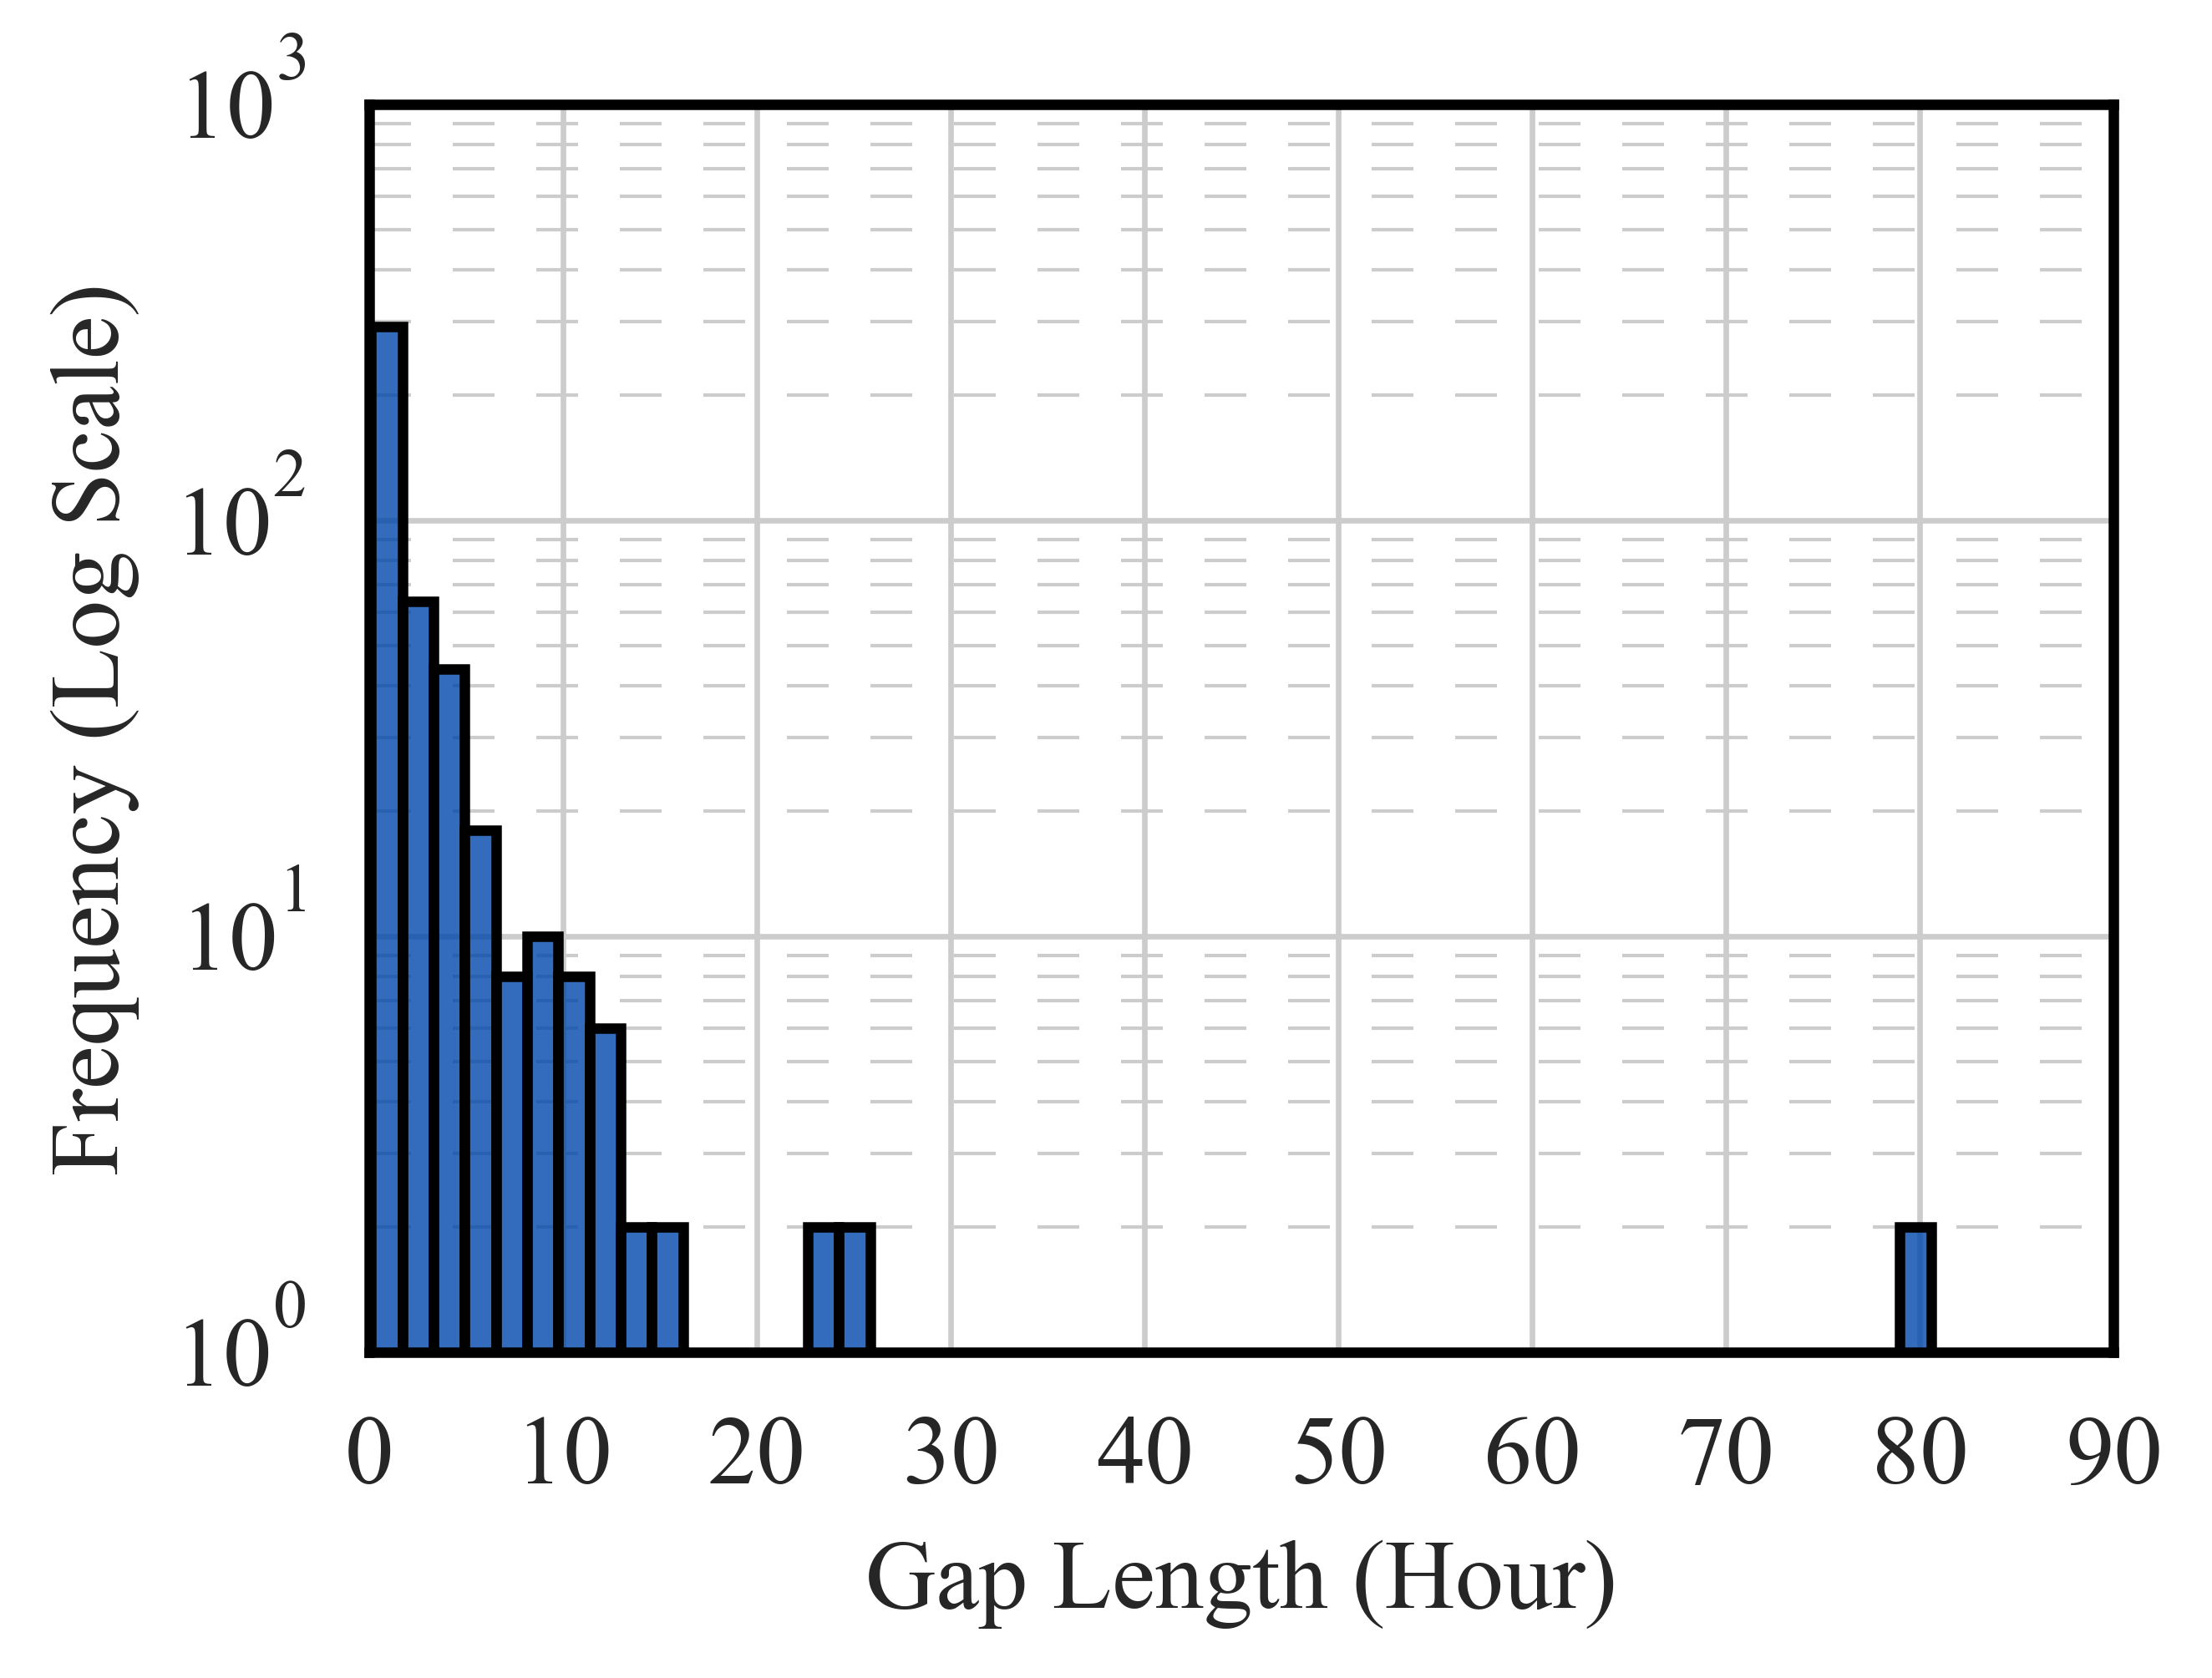

In [212]:
# Create the plot
plt.figure(figsize=(4, 3), dpi=600)
sns.histplot(flattened, bins=50, edgecolor='black', alpha=0.8, linewidth=1.5, color = '#0047ab')

# Set axis labels and scale
plt.xlabel("Gap Length (Hour)")
plt.ylabel("Frequency (Log Scale)")
plt.yscale('log')

# Add grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


# Skewness

In [306]:
all_series = []
for x in [input_folder, input_folder2]:
    for top, _, files in os.walk(input_folder):
        if files:
            sub_path = os.path.relpath(top, input_folder)
            print()

            csv_files = [file for file in os.listdir(top) if file.endswith(".csv")]

            for file in csv_files:
                file_path = os.path.join(top, file)
                # print(file_path)
                if top[-4:] != 'test':
                    df = pd.read_csv(file_path)
                    try:
                        df['ts'] = pd.to_datetime(df['ts'].astype(str), format="%d-%m-%Y %H:%M:%S")
                    except Exception as e:
                        df['ts'] = pd.to_datetime(df['ts'].astype(str), format="%Y-%m-%d %H:%M:%S")

                    df.set_index('ts', inplace=True)
                    all_series.append(df['value'].values)

In [307]:
from scipy.stats import skew
import numpy as np

# Example data: Replace these with your 12 series
series_list = all_series

# Analyze skewness for each series
log_transform_needed = []
for i, series in enumerate(series_list):
    skewness = skew(series)
    print(f"Series {i+1}: Skewness = {skewness:.2f}")
    if skewness > 0.5:  # Example threshold for right skewness
        log_transform_needed.append(True)
    else:
        log_transform_needed.append(False)

# Summary of results
for i, need_log in enumerate(log_transform_needed):
    print(f"Series {i+1}: {'Needs log scaling' if need_log else 'Does not need log scaling'}")


Series 1: Skewness = 0.64
Series 2: Skewness = 0.80
Series 3: Skewness = 0.03
Series 4: Skewness = 1.02
Series 5: Skewness = 0.52
Series 6: Skewness = 0.49
Series 7: Skewness = 0.64
Series 8: Skewness = 0.80
Series 9: Skewness = 0.03
Series 10: Skewness = 1.02
Series 11: Skewness = 0.52
Series 12: Skewness = 0.49
Series 1: Needs log scaling
Series 2: Needs log scaling
Series 3: Does not need log scaling
Series 4: Needs log scaling
Series 5: Needs log scaling
Series 6: Does not need log scaling
Series 7: Needs log scaling
Series 8: Needs log scaling
Series 9: Does not need log scaling
Series 10: Needs log scaling
Series 11: Needs log scaling
Series 12: Does not need log scaling


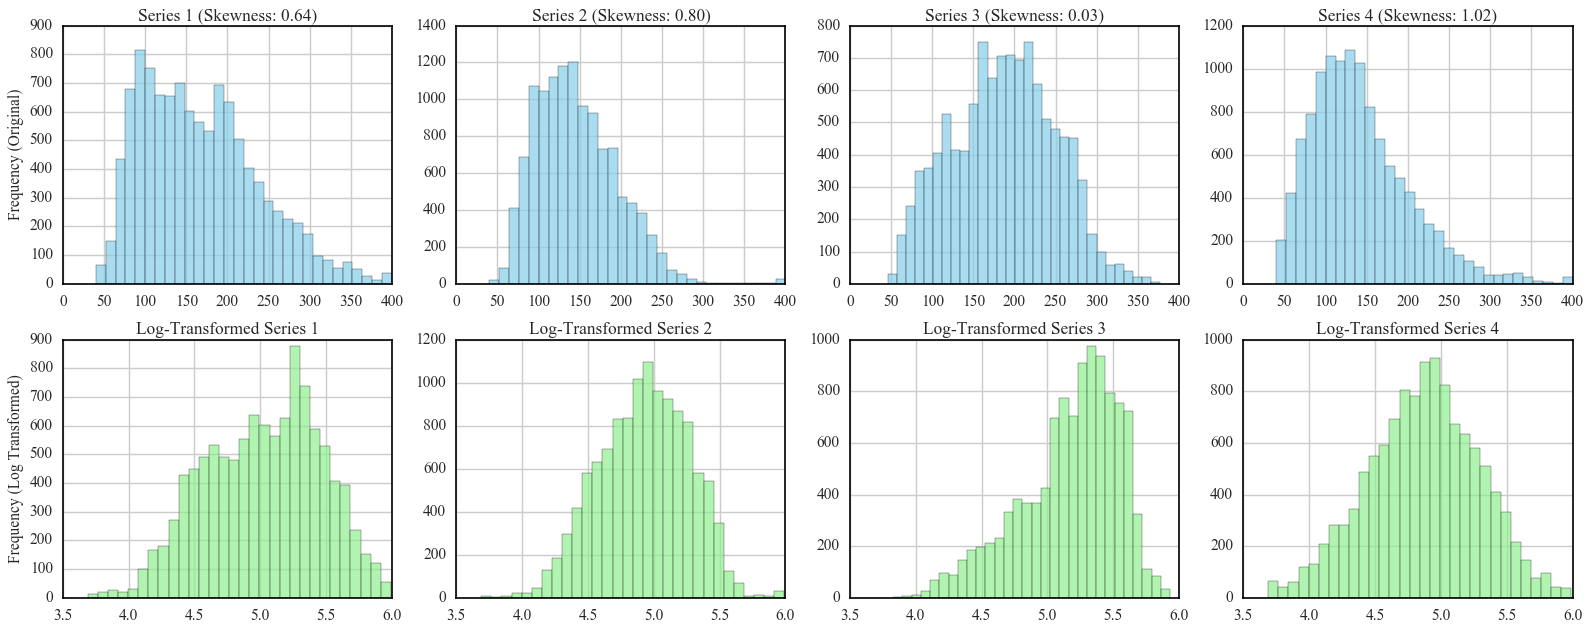

In [278]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, len(series_list[:4]), figsize=(20, 8))  # Compare for first 4 series as an example

for i, series in enumerate(series_list[:4]):  # Visualize first 4 series
    # Original data
    axes[0, i].hist(series, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f"Series {i+1} (Skewness: {skew(series):.2f})")
    
    # Log-transformed data
    transformed = np.log(series)  # log1p avoids issues with zeros
    axes[1, i].hist(transformed, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, i].set_title(f"Log-Transformed Series {i+1}")

axes[0, 0].set_ylabel("Frequency (Original)")
axes[1, 0].set_ylabel("Frequency (Log Transformed)")
plt.tight_layout()
plt.show()

In [359]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [360]:

# Apply style
# plt.style.use("tableau-colorblind10")
plt.style.use("default")

# Set Times New Roman font and darker border
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 18     # Axis label font size
plt.rcParams['xtick.labelsize'] = 18      # X-tick font size
plt.rcParams['ytick.labelsize'] = 18      # Y-tick font size
plt.rcParams['legend.fontsize'] = 18      # Y-tick font size

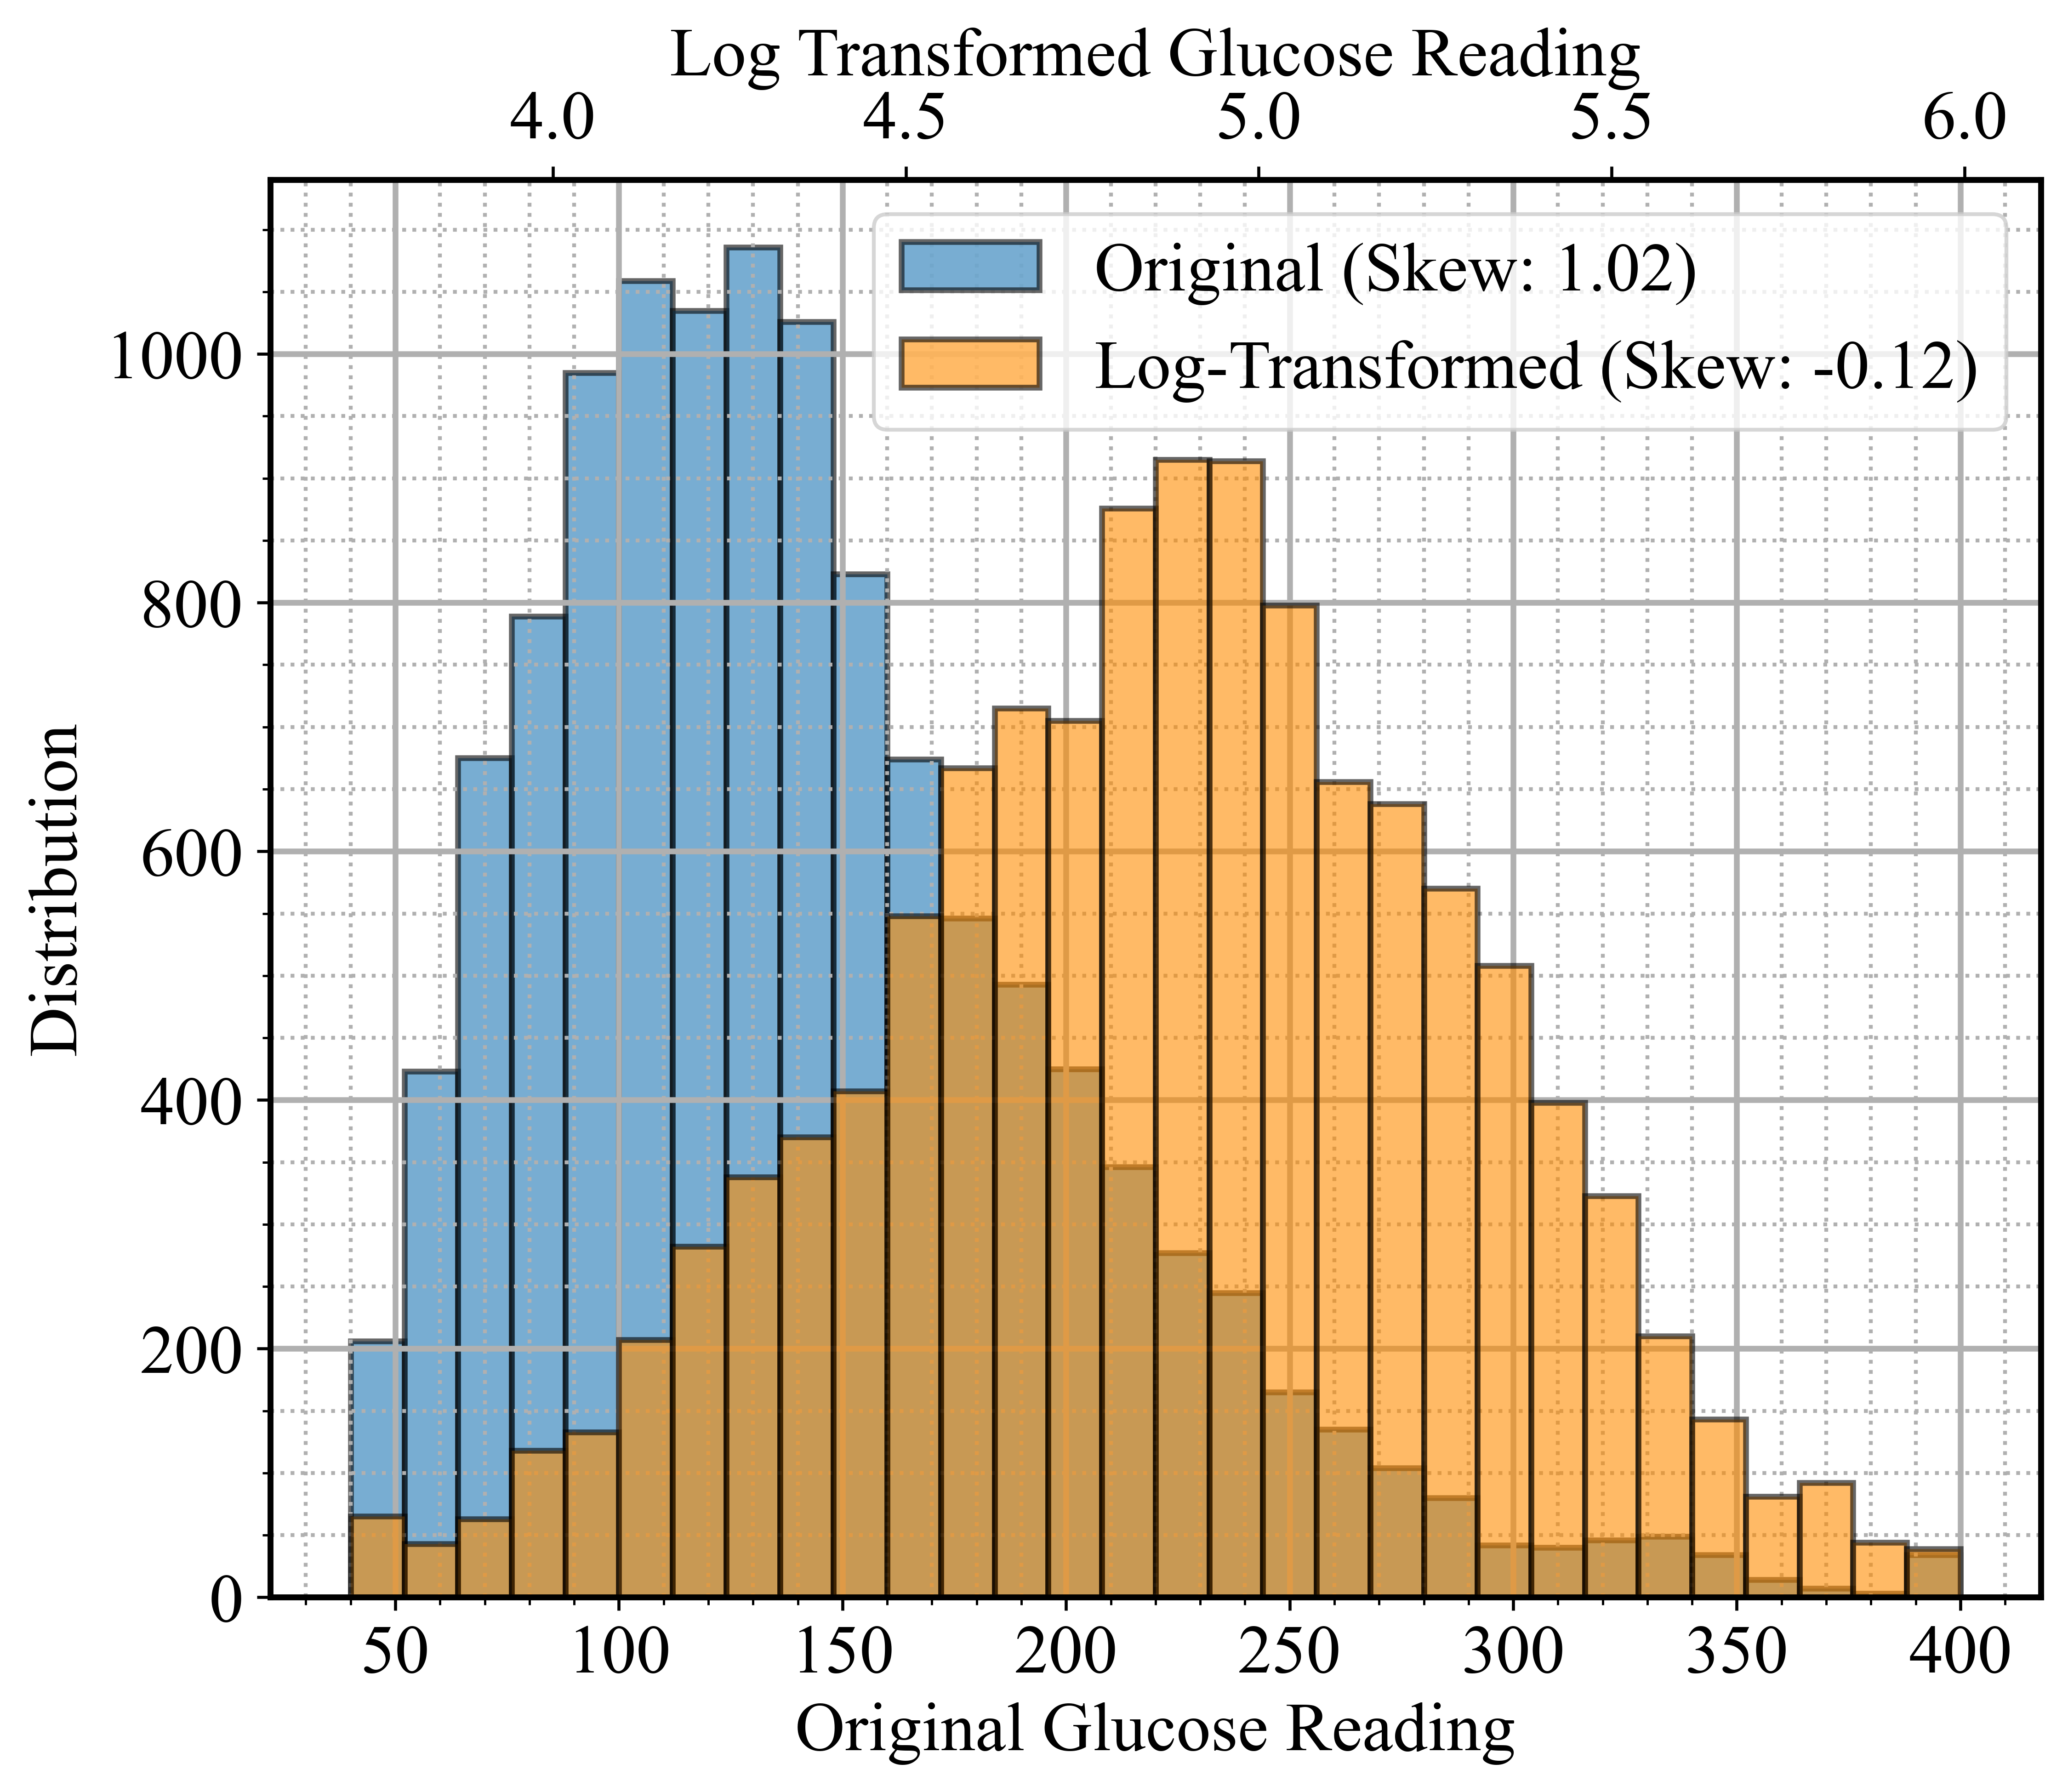

In [380]:
# Create a figure
fig, ax = plt.subplots(figsize=(7.6, 6.6), dpi =600)

# Calculate the skewness and plot all series on the primary x-axis (original values)
idx = 3
series = series_list[idx]
original_skewness = skew(series)
ax.hist(series, bins=30, alpha=0.6, label=f"Original (Skew: {original_skewness:.2f})",
        edgecolor='black', linewidth=1.5)

# Set labels for the primary x-axis
ax.set_xlabel("Original Glucose Reading")
ax.set_ylabel("Distribution")
# ax.legend(loc="upper right" , bbox_to_anchor=(1, 1))

# Create a twin x-axis for log-transformed values
ax2 = ax.twiny()

# Plot all series on the secondary x-axis (log-transformed values)
log_transformed = np.log1p(series)
log_skewness = skew(log_transformed)
ax2.hist(log_transformed, bins=30, alpha=0.6, label=f"Log-Transformed (Skew: {log_skewness:.2f})",
            edgecolor='black', color = '#FF8C00', linewidth=1.5 )

# Set labels for the secondary x-axis
ax2.set_xlabel("Log Transformed Glucose Reading")
# ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.92))

handles1, labels1 = ax.get_legend_handles_labels()  # Get legend items from primary axis
handles2, labels2 = ax2.get_legend_handles_labels()  # Get legend items from secondary axis
ax.legend(handles1 + handles2, labels1 + labels2, loc="upper right")  # Combined legend


ax.grid(True, which="major", linestyle="-", linewidth=1.5)  # Major grid
ax.grid(True, which="minor", linestyle=":", linewidth=1)  # Minor grid

ax.minorticks_on()

# ax.grid(True, which="both", linestyle="--", linewidth=1)  # Add grid to primary axis
ax2.grid(False)  # Ensure no overlapping grids from the secondary x-axis

# Show the plot
plt.tight_layout()
plt.show()

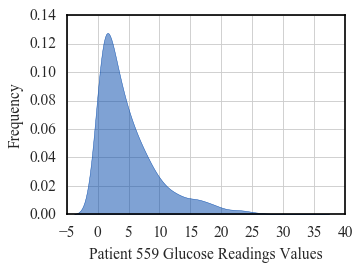

In [ ]:
# Create the plot
plt.figure(figsize=(4, 3))
# sns.histplot(series_list[0], color = '#0047ab', kde=True)
sns.kdeplot(series_list[0], color='#0047ab', fill=True, alpha=0.5, label='Original Readings')
# sns.kdeplot(np.log(series_list[0]), color='#0047ab', fill=True, alpha=0.5, label='Original Readings')

# Set axis labels and scale
plt.xlabel("Patient 559 Glucose Readings Values")
plt.ylabel("Frequency")
# plt.yscale('log')

# Add grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


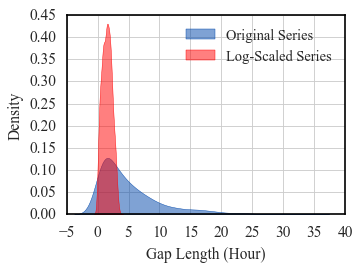

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data: Replace with your actual series
series_list = [np.random.exponential(scale=5, size=1000) for _ in range(1)]

# Log-transform the series
log_series = np.log1p(series_list[0])

# Define a common x-axis range
x_min = min(min(series_list[0]), min(log_series))
x_max = max(max(series_list[0]), max(log_series))
x_range = np.linspace(x_min, x_max, 500)

# Create the plot
plt.figure(figsize=(4, 3))

# Original series KDE with blue transparent fill
sns.kdeplot(series_list[0], color='#0047ab', fill=True, alpha=0.5, label='Original Series')

# Log-scaled series KDE with red transparent fill
sns.kdeplot(log_series, color='red', fill=True, alpha=0.5, label='Log-Scaled Series')

# Adjust x-axis range to a shared range
# plt.xlim(x_min, x_max)

# Set axis labels and legend
plt.xlabel("Gap Length (Hour)")
plt.ylabel("Density")
plt.legend()

# Add grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8)
plt.grid(True, which='minor', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


In [23]:
np.array([0.04, 0.03, 0.03, 0.04, 0.03, 0.05]) *5

array([0.2 , 0.15, 0.15, 0.2 , 0.15, 0.25])

In [36]:

# Apply style
# plt.style.use("tableau-colorblind10")
plt.style.use("default")

# Set Times New Roman font and darker border
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 20     # Axis label font size
plt.rcParams['xtick.labelsize'] = 20      # X-tick font size
plt.rcParams['ytick.labelsize'] = 20      # Y-tick font size
plt.rcParams['legend.fontsize'] = 20      # Y-tick font size

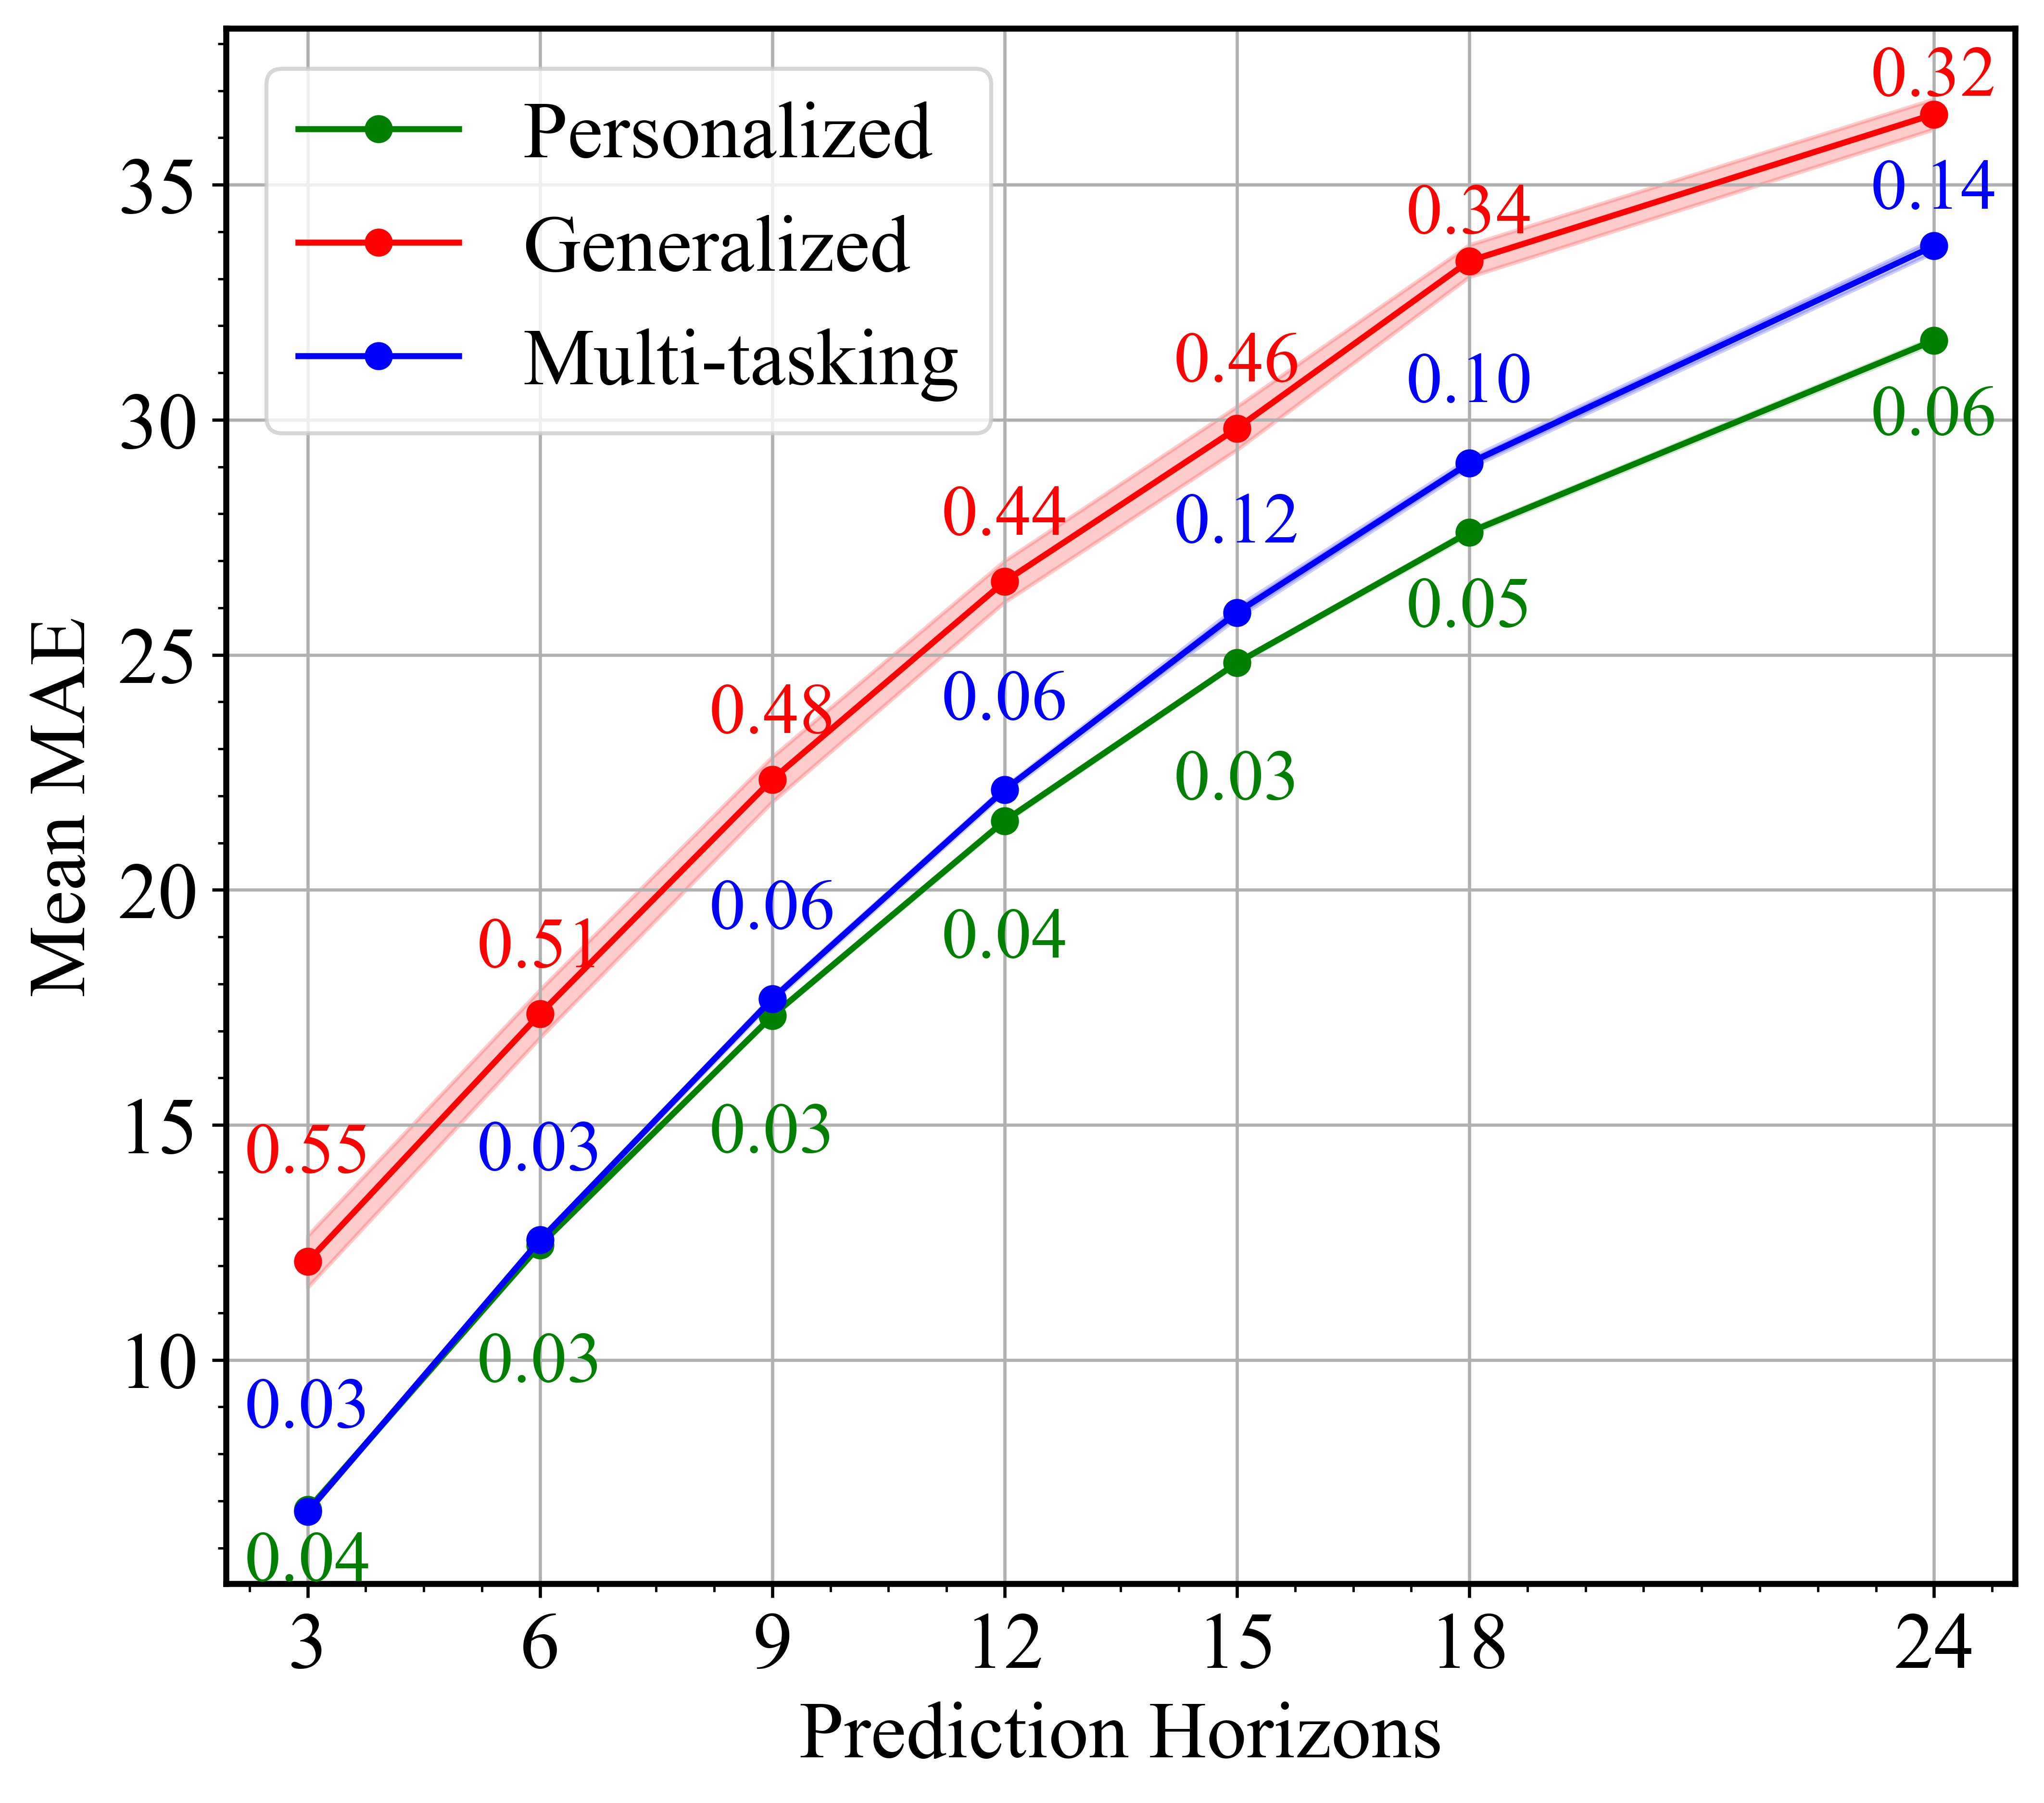

In [39]:
# Re-import necessary libraries since code execution environment reset
import matplotlib.pyplot as plt
import numpy as np

# Reinitialize data
horizons = [3, 6, 9, 12,15, 18, 24]

# Mean MAE values
personalized_mae = [6.81, 12.44, 17.32, 21.47, 24.83, 27.61, 31.69]
generalized_mae = [12.09, 17.36, 22.35, 26.56, 29.82, 33.38, 36.50]
multitasking_mae = [6.77, 12.55, 17.68, 22.13, 25.90, 29.08, 33.70]

# Standard deviations
personalized_std = np.array([0.04, 0.03, 0.03, 0.04, 0.03, 0.05, 0.06])
generalized_std = np.array([0.55, 0.51, 0.48, 0.44, 0.46, 0.34, 0.32]) 
multitasking_std = np.array([0.03, 0.03, 0.06, 0.06, 0.12, 0.10, 0.14])

# Convert data to numpy arrays for shading
personalized_mae = np.array(personalized_mae)
generalized_mae = np.array(generalized_mae)
multitasking_mae = np.array(multitasking_mae)

personalized_std = np.array(personalized_std)
generalized_std = np.array(generalized_std)
multitasking_std = np.array(multitasking_std)

# Plot with shaded areas for standard deviation
plt.figure(figsize=(8, 7), dpi=600)
plt.plot(horizons, personalized_mae, marker='o', label="Personalized", color='green')
plt.fill_between(horizons, personalized_mae - personalized_std, personalized_mae + personalized_std, color='green', alpha=0.2)

plt.plot(horizons, generalized_mae, marker='o', label="Generalized", color='red')
plt.fill_between(horizons, generalized_mae - generalized_std, generalized_mae + generalized_std, color='red', alpha=0.2)

plt.plot(horizons, multitasking_mae, marker='o', label="Multi-tasking", color='blue')
plt.fill_between(horizons, multitasking_mae - multitasking_std, multitasking_mae + multitasking_std, color='blue', alpha=0.2)

# Annotate the standard deviations
for i, horizon in enumerate(horizons):
    if i == 0:
        plt.annotate(f"{personalized_std[i]:.2f}", (horizon, personalized_mae[i] - 1.5), fontsize=18, color='green', ha='center')
        plt.annotate(f"{generalized_std[i]:.2f}", (horizon, generalized_mae[i] + 1.9), fontsize=18, color='red', ha='center')
        plt.annotate(f"{multitasking_std[i]:.2f}", (horizon, multitasking_mae[i] +1.8), fontsize=18, color='blue', ha='center')
    elif i ==5:
        plt.annotate(f"{personalized_std[i]:.2f}", (horizon, personalized_mae[i] - 2), fontsize=18, color='green', ha='center')
        plt.annotate(f"{generalized_std[i]:.2f}", (horizon, generalized_mae[i] + 0.6), fontsize=18, color='red', ha='center')
        plt.annotate(f"{multitasking_std[i]:.2f}", (horizon, multitasking_mae[i] +1.3), fontsize=18, color='blue', ha='center')

    elif i ==6:
        plt.annotate(f"{personalized_std[i]:.2f}", (horizon, personalized_mae[i] - 2), fontsize=18, color='green', ha='center')
        plt.annotate(f"{generalized_std[i]:.2f}", (horizon, generalized_mae[i] + 0.4), fontsize=18, color='red', ha='center')
        plt.annotate(f"{multitasking_std[i]:.2f}", (horizon, multitasking_mae[i] +0.8), fontsize=18, color='blue', ha='center')

    else:
        plt.annotate(f"{personalized_std[i]:.2f}", (horizon, personalized_mae[i] - 2.9), fontsize=18, color='green', ha='center')
        plt.annotate(f"{generalized_std[i]:.2f}", (horizon, generalized_mae[i] + 1), fontsize=18, color='red', ha='center')
        plt.annotate(f"{multitasking_std[i]:.2f}", (horizon, multitasking_mae[i] +1.5), fontsize=18, color='blue', ha='center')

# Add labels, title, and legend
# plt.yscale('log')
# # plt.title("Comparison of Mean MAE Across Prediction Horizons with Standard Deviations")
# plt.grid(True, which='major', linestyle='-', linewidth=0.8)
# plt.grid(True, which='minor', linestyle='--', linewidth=0.5)
# plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.xticks(horizons, [str(horizon) for horizon in horizons])
plt.xlabel("Prediction Horizons")
plt.ylabel("Mean MAE")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Re-plot without the generalized model and annotate exact numbers
plt.figure(figsize=(12, 6))
bar_width = 0.35

# Plot bars for Personalized and Multi-tasking MAE
plt.bar(x - bar_width / 2, personalized_mae, width=bar_width, label="Personalized MAE", color='orange')
plt.bar(x + bar_width / 2, multitasking_mae, width=bar_width, label="Multi-tasking MAE", color='blue')

# Annotate exact values above each bar
for i in range(len(patients)):
    plt.text(x[i] - bar_width / 2, personalized_mae[i] + 0.1, f"{personalized_mae[i]:.2f}", 
             ha='center', va='bottom', fontsize=8, color='black')
    plt.text(x[i] + bar_width / 2, multitasking_mae[i] + 0.1, f"{multitasking_mae[i]:.2f}", 
             ha='center', va='bottom', fontsize=8, color='black')

# Add labels, title, and legend
plt.xticks(x, patients)
plt.xlabel("Patient IDs")
plt.ylabel("MAE")
plt.title("Comparison of MAE for Each Patient (Personalized vs Multi-tasking)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [42]:

# Apply style
# plt.style.use("tableau-colorblind10")
plt.style.use("default")

# Set Times New Roman font and darker border
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.labelsize'] = 14     # Axis label font size
plt.rcParams['xtick.labelsize'] = 14      # X-tick font size
plt.rcParams['ytick.labelsize'] = 14      # Y-tick font size
plt.rcParams['legend.fontsize'] = 14      # Y-tick font size

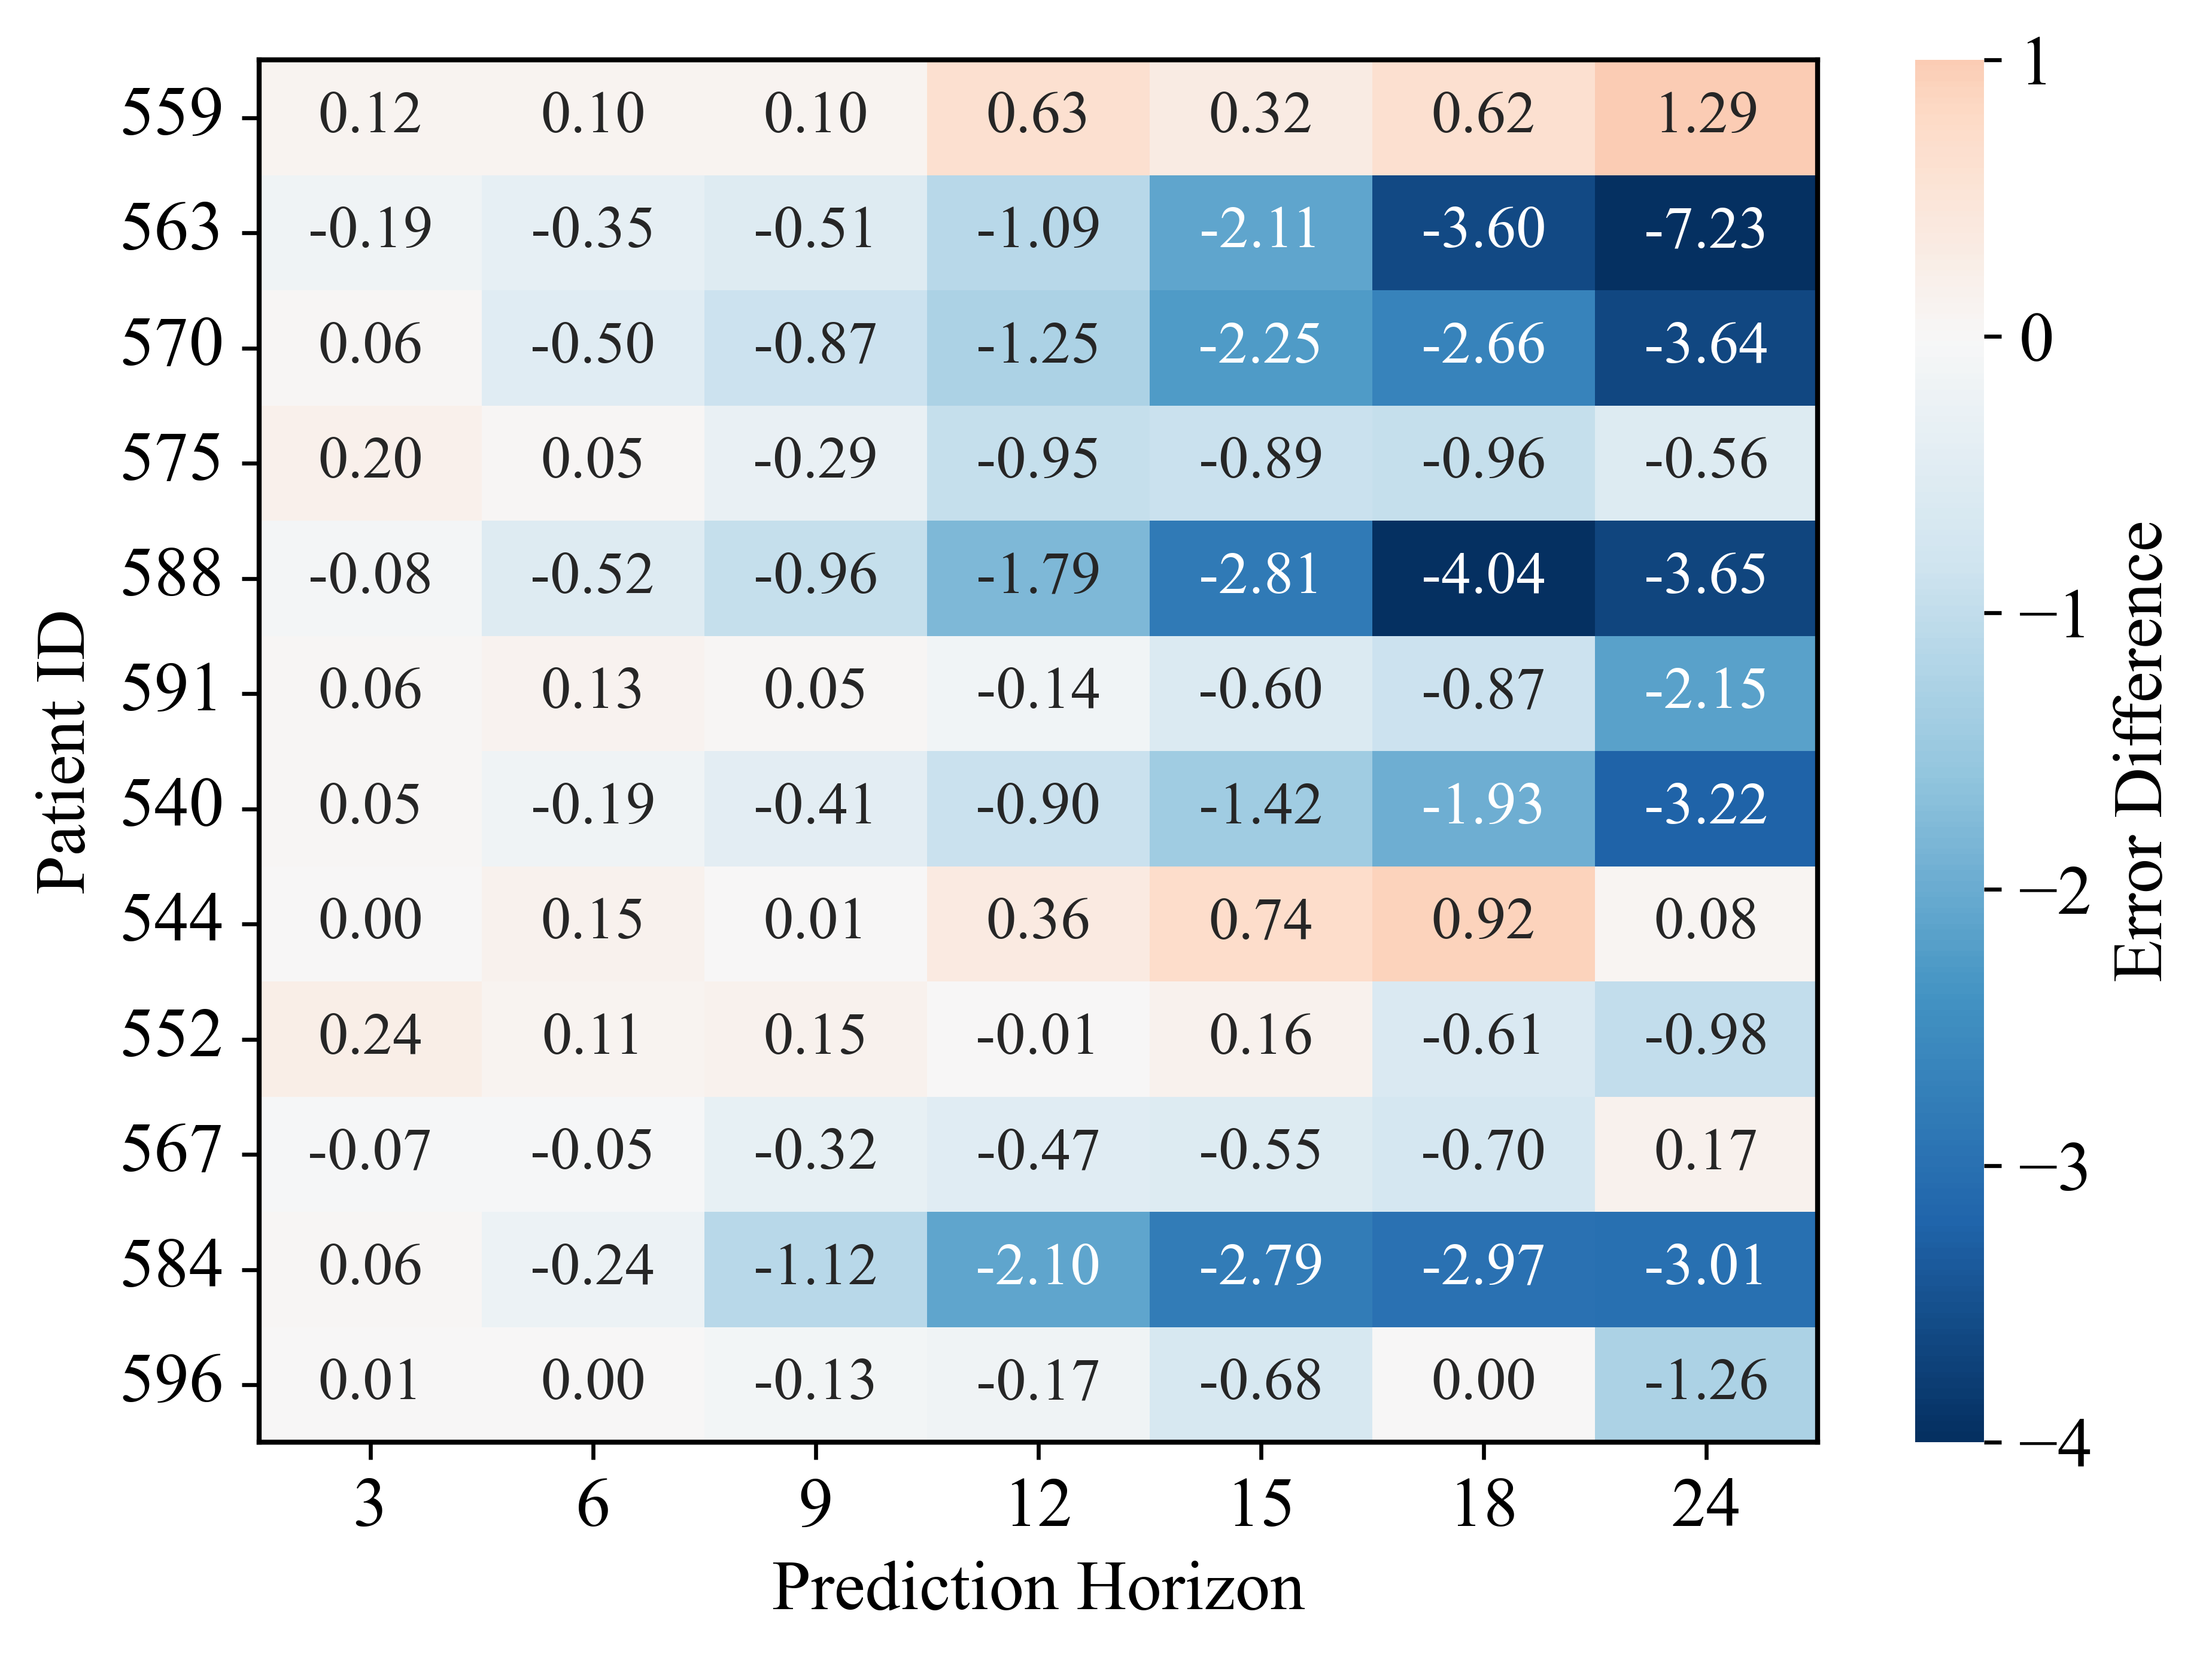

In [43]:
import matplotlib.patches as patches
import seaborn as sns

# Reinitialize data for all prediction horizons (differences between Personalized and Multi-tasking)
horizons = ["3", "6", "9", "12", "15", "18", "24"]
patients = ["559", "563", "570", "575", "588", "591", "540", "544", "552", "567", "584", "596"]

# Personalized and Multi-tasking MAE for all horizons (reconstructed from provided data earlier)
personalized_mae_all = [
    [5.50, 10.25, 14.78, 18.92, 22.24, 25.22, 29.75],
    [7.73, 13.37, 18.29, 22.60, 25.97, 28.65, 32.88],
    [4.47, 7.79, 11.02, 13.66, 15.92, 17.80, 21.42],
    [6.97, 12.46, 16.77, 20.71, 23.57, 26.76, 30.72],
    [7.61, 13.90, 19.24, 23.37, 26.73, 29.27, 33.16],
    [8.31, 14.77, 19.79, 23.79, 27.15, 29.85, 32.77],
    [6.43, 12.72, 18.64, 23.37, 26.89, 29.52, 33.79],
    [6.41, 11.91, 16.37, 20.85, 24.79, 28.24, 32.84],
    [6.65, 12.81, 18.47, 22.85, 26.26, 28.28, 32.17],
    [7.12, 13.89, 19.71, 24.69, 28.58, 31.62, 35.53],
    [7.52, 13.13, 17.88, 21.95, 25.69, 28.93, 33.18],
    [7.01, 12.33, 16.89, 20.92, 24.16, 27.96, 32.10]
]


multitasking_mae_all = [
    [5.38, 10.15, 14.68, 18.29, 21.92 ,24.60, 28.46],
    [7.92, 13.72, 18.80, 23.69, 28.08, 32.25, 40.11],
    [4.41, 8.29, 11.89, 14.91, 18.17, 20.46, 25.06],
    [6.77, 12.41, 17.06, 21.66, 24.46, 27.72, 31.28],
    [7.69, 14.42, 20.20, 25.16, 29.54, 33.31, 36.81],
    [8.25, 14.64, 19.74, 23.93, 27.75, 30.72, 34.92],
    [6.38, 12.91, 19.05, 24.27, 28.31, 31.45, 37.01],
    [6.41, 11.76, 16.36, 20.49, 24.05, 27.32, 32.76],
    [6.41, 12.70, 18.32, 22.86, 26.10, 28.89, 33.15],
    [7.19, 13.94, 20.03, 25.16, 29.13, 32.32, 35.36],
    [7.46, 13.37, 19.00, 24.05, 28.48, 31.90, 36.19],
    [7.00, 12.33, 17.02, 21.09, 24.84, 27.96, 33.36]
]



# Calculate differences between Personalized and Multi-tasking
difference = np.array(personalized_mae_all) - np.array(multitasking_mae_all)

# Create a heatmap with an outside border only
plt.figure(figsize=(7, 5), dpi = 600)
ax = sns.heatmap(difference, annot=True, fmt=".2f", cmap="RdBu_r", center=0, 
                 xticklabels=horizons, yticklabels=patients, cbar_kws={'label': 'Error Difference'}, vmin=-4, vmax=1,
                     annot_kws={"fontsize": 12}  # Set the font size for cell annotations
)

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('black')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


# plt.title("Difference Between Personalized and Multi-tasking MAE")
plt.xlabel("Prediction Horizon")
plt.ylabel("Patient ID")
plt.show()


# predicted vs actual

In [44]:
from src.time_series_prep import *
from models.shared_layer import *
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *


In [78]:
prediction_horizons = [24, 18, 15, 12, 9, 6, 3]
model_types = ['personalized', 'shared-layer', 'generalized']

Patient 559
2859
2859
2859
2859


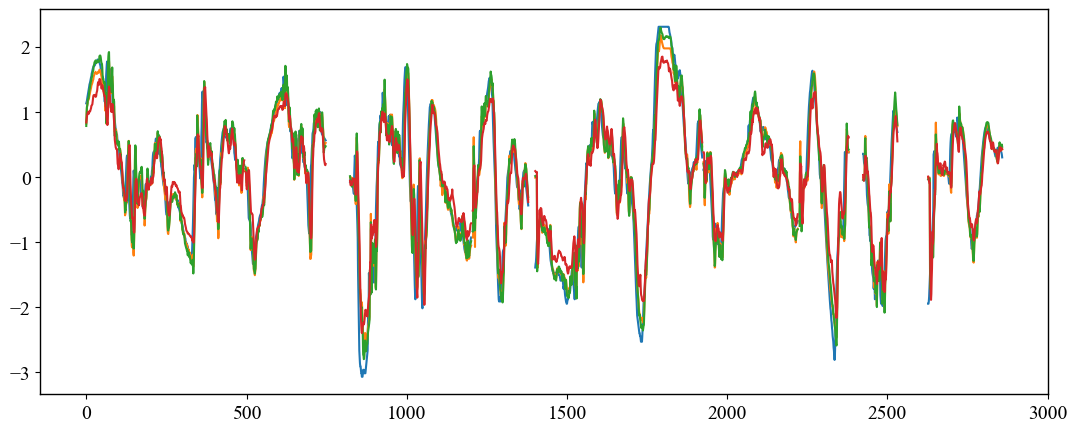

In [80]:
plt.figure(figsize=(13,5))
index = 0
  
for model_type in model_types:
    
  
    if model_type == 'personalized':
        scaler, train_patients, test_patients = process_all_csv_files_personalized(input_folder, output_folder)
        for i, patient in enumerate(train_patients.items()):
            patient_code = patient[0]
            df = patient[1]
            logger.info(f"Patient {patient_code}")
            print(f"Patient {patient_code}")
            # print(df)

            df_test = list(test_patients.values())[i]
            break

        train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, 6,
                                                                                        model_type , split_ratio=0.8, df = df, df_test = df_test, output_folder_train = None, shuffle = False)
        model_all_train_read =  PersonalizedModelWithAttention(input_shape =input_shape , output_shape=output_shape)

        model_all_train_read.load_state_dict(torch.load(f'saved_models\model_{model_type}_6_559_0.pth',weights_only=False))
    elif model_type == 'shared-layer':
        scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5min', agg_func='mean')
        _, _, _, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, 6,
                                                                                        model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)

        model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
        model_all_train_read.load_state_dict(torch.load(f'saved_models\model_{model_type}_attention_6_0.pth',weights_only=False))
    else:
        _, _, _, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, 6,
                                                                                        model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)

        model_all_train_read =  GeneralizedModelWithAttention(input_shape =input_shape , output_shape=output_shape)

        model_all_train_read.load_state_dict(torch.load(f'saved_models\model_{model_type}_attention_6_0.pth',weights_only=False))

    model_all_train_read.to(device)
    model_all_train_read.eval()

    
   

    if model_type == 'personalized':
        outputs_all_batches, targets_all_batches = model_prediction(model_all_train_read,test_loader, device, model_type)

        outputs = torch.cat(outputs_all_batches, dim=0).cpu()
        targets = torch.cat(targets_all_batches, dim=0).cpu()
        print(len(targets))
        print(len(outputs))

        mask = (targets == 0)

        targets = np.where(mask, None, targets)
        outputs = np.where(mask, None, outputs)

        patient1_target = [sublist[index] for sublist in targets]
        patient1_output = [ sublist[index]  for sublist in outputs]
        plt.plot(patient1_target)
    else:
        outputs_all_batches, _ = model_prediction(model_all_train_read,test_loader, device, model_type)

        outputs = torch.cat(outputs_all_batches, dim=0).cpu()[:2859]
        print(len(outputs))


        outputs = np.where(mask, None, outputs)

        patient1_output = [ sublist[index]  for sublist in outputs]
    plt.plot(patient1_output)
plt.show()